In [ ]:
print("Name:PRAVEEN S")
print("Reg no:212222240077")

Name:PRAVEEN S
Reg no:212222240077


In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense


In [3]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()


NameError: name 'mnist' is not defined

In [ ]:
X_train.shape

In [ ]:

single_image= X_train[0]

In [ ]:

single_image.shape

In [ ]:
plt.imshow(single_image,cmap='gray')

In [ ]:

y_train.shape

In [ ]:
X_train.min()

In [ ]:
X_train.max()

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()

In [ ]:
X_train_scaled.max()

In [ ]:
y_train[0]

5

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

numpy.ndarray

In [ ]:
y_train_onehot.shape

(60000, 10)

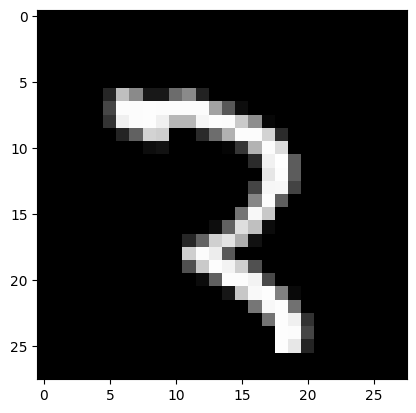

In [ ]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
model = keras.Sequential()
inputs1=keras.Input(shape=(28,28,1))
model.add(inputs1)
model.add(layers.Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(15,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 32)                147488    
                                                                 
 dense_1 (Dense)             (None, 15)                495       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=6,batch_size=64,validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/6
938/938 [==============================] - 28s 29ms/step - loss: 0.2645 - accuracy: 0.9194 - val_loss: 0.0847 - val_accuracy: 0.9742
Epoch 2/6
938/938 [==============================] - 28s 30ms/step - loss: 0.0827 - accuracy: 0.9752 - val_loss: 0.0666 - val_accuracy: 0.9787
Epoch 3/6
938/938 [==============================] - 28s 30ms/step - loss: 0.0575 - accuracy: 0.9830 - val_loss: 0.0517 - val_accuracy: 0.9831
Epoch 4/6
938/938 [==============================] - 26s 28ms/step - loss: 0.0456 - accuracy: 0.9861 - val_loss: 0.0451 - val_accuracy: 0.9843
Epoch 5/6
938/938 [==============================] - 26s 28ms/step - loss: 0.0366 - accuracy: 0.9886 - val_loss: 0.0570 - val_accuracy: 0.9832
Epoch 6/6
938/938 [==============================] - 26s 28ms/step - loss: 0.0294 - accuracy: 0.9906 - val_loss: 0.0432 - val_accuracy: 0.9864


In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:

metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.264523,0.919400,0.084681,0.9742
1,0.082693,0.975217,0.066618,0.9787
2,0.057471,0.983033,0.051718,0.9831
3,0.045626,0.986050,0.045080,0.9843
4,0.036574,0.988567,0.057026,0.9832


<Axes: >

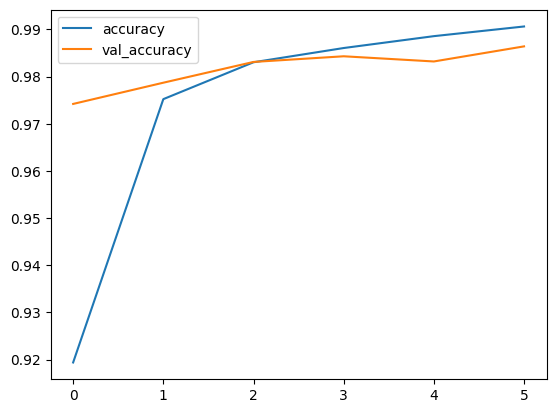

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

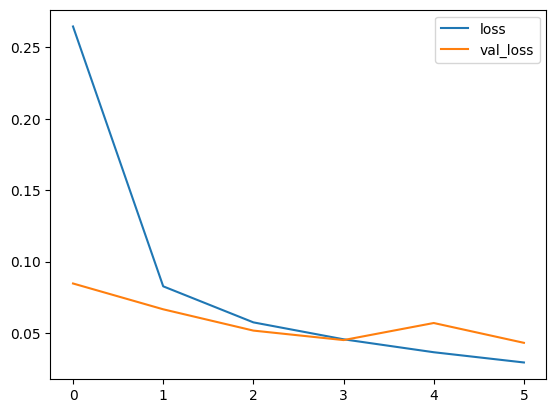

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 3s 9ms/step


In [ ]:
print("Name:PRAVEEN S")
print("Reg no:212222240077")
print(confusion_matrix(y_test,x_test_predictions))

Name:PRAVEEN S
Reg no:212222240077
[[ 974    0    1    0    0    1    1    2    1    0]
 [   0 1133    0    2    0    0    0    0    0    0]
 [   1    2 1015    5    0    0    0    8    1    0]
 [   0    0    1 1006    0    0    0    1    1    1]
 [   0    0    3    0  964    0    0    0    1   14]
 [   3    0    0   19    0  866    3    0    1    0]
 [   6    3    0    1    1    2  942    0    3    0]
 [   1    2    5    0    0    0    0 1017    1    2]
 [   3    0    1    5    1    0    1    6  951    6]
 [   3    2    0    1    2    2    0    3    0  996]]


In [ ]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.98      0.99      1032
           3       0.97      1.00      0.98      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:

img = image.load_img('1.png')


In [ ]:
type(img)


PIL.Image.Image

In [ ]:
img = image.load_img('1.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [ ]:

x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 133ms/step


In [ ]:

print(x_single_prediction)

[1]


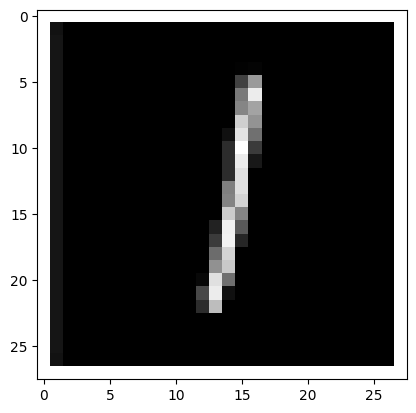

In [ ]:

plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [ ]:
print("Name:PRAVEEN S")
print("Reg no:212222240077")

Name:PRAVEEN S
Reg no:212222240077
